In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\malay\OneDrive\Dokumen\Sandu\mobilephone.csv")

In [3]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


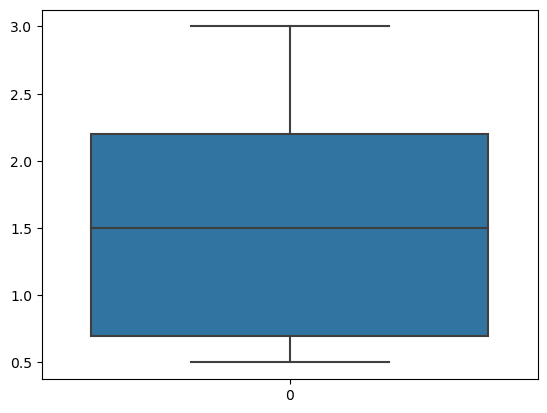

In [5]:
sns.boxplot(df["clock_speed"])
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [7]:
x=df.iloc[:,:-1]
y=df['price_range']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

# Logistic Regression

In [9]:
lr=LogisticRegression(solver="newton-cholesky")
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(97.6, 99.26666666666667)

In [40]:
print(accuracy_score(y_test,lr.predict(x_test)))
print(precision_score(y_test,lr.predict(x_test),average="macro"))
print(recall_score(y_test,lr.predict(x_test),average="macro"))
print(f1_score(y_test,lr.predict(x_test),average="macro"))

0.976
0.9750495046334672
0.9756022106378801
0.9752486072054041


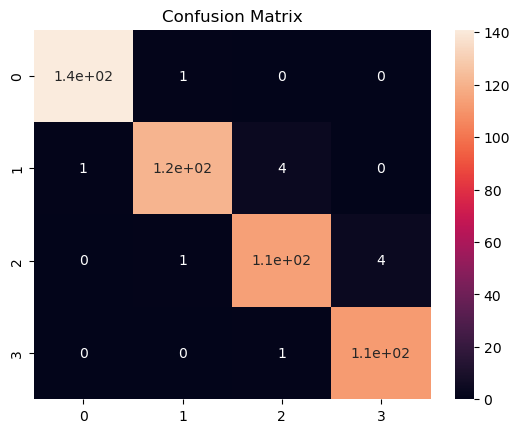

In [11]:
cf=confusion_matrix(y_test,lr.predict(x_test))
sns.heatmap(cf,annot=True)
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier(criterion="log_loss")
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(87.0, 100.0)

In [38]:
print(accuracy_score(y_test,dt.predict(x_test)))
print(precision_score(y_test,dt.predict(x_test),average="macro"))
print(recall_score(y_test,dt.predict(x_test),average="macro"))
print(f1_score(y_test,dt.predict(x_test),average="macro"))

0.87
0.8694787452873896
0.869534416866169
0.8690652570900235


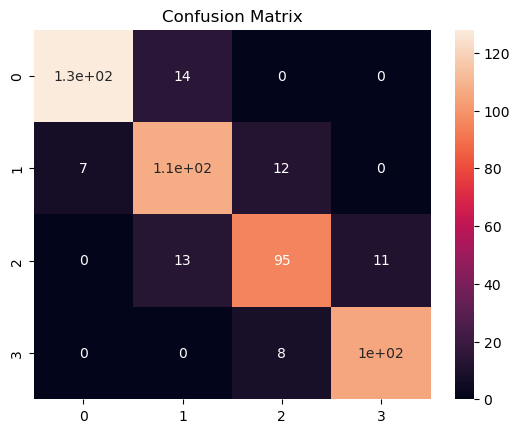

In [41]:
cf=confusion_matrix(y_test,dt.predict(x_test))
sns.heatmap(cf,annot=True)
plt.title("Confusion Matrix")
plt.show()

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(criterion="log_loss")
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100

(90.0, 100.0)

In [47]:
print(accuracy_score(y_test,rf.predict(x_test)))
print(precision_score(y_test,rf.predict(x_test),average="macro"))
print(recall_score(y_test,rf.predict(x_test),average="macro"))
print(f1_score(y_test,rf.predict(x_test),average="macro"))

0.9
0.8993056837702242
0.8989903327652886
0.8989512720213585


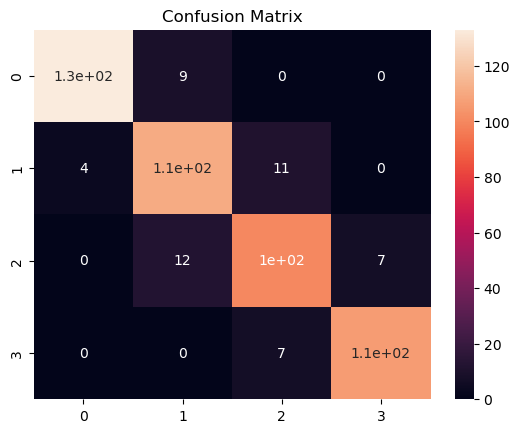

In [48]:
cf=confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cf,annot=True)
plt.title("Confusion Matrix")
plt.show()